In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def get_file_data(csv, pos):
    csvf = open(csv, 'r')
    csvflines = csvf.readlines()
    csvf.close()
    
    data = []    
    for line in csvflines[1:]:
        values =  line.strip('\n[]').split(',')
        if pos == 7:
            data.append(int(values[pos]) // 1000)
        else:
            data.append(float(values[pos]))        
        
    return data

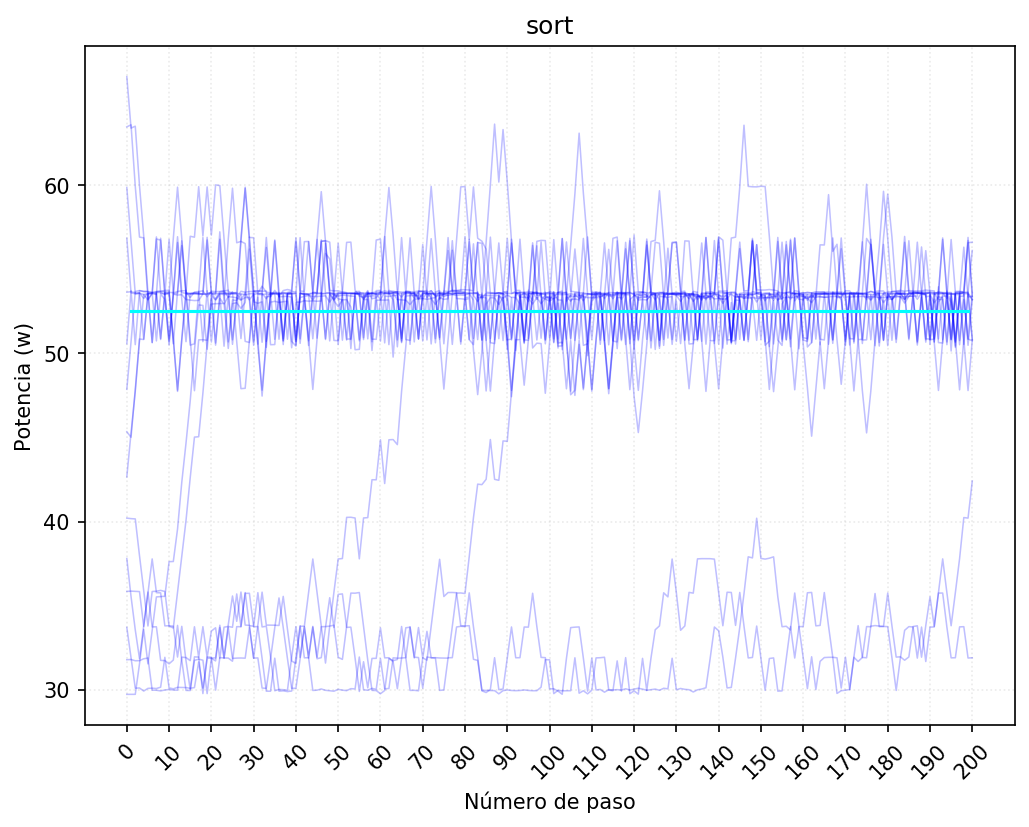

In [14]:
########################
### POWER MEAN ERROR ###
########################
key = 'power'
clr = 'blue'
pos = 8
target = 52.5
X = range(0, 201)
Xticks = np.arange(0, 201, 10)
Yticks = np.arange(30, 70, 10)

tests = [f'test-{i}1' for i in [0,1,2]]
labels = ['producto', 'suma', 'sort']
clrs  = ['blue', 'cyan', 'midnightblue']
chkpt = 5

fig = plt.figure(figsize=(8,6), dpi=150)
ax = fig.add_subplot(111)

plt.title('sort')

test = 'test-21'

for it in range(15):
    data = get_file_data(test + f'/checkpoint-{chkpt}/iter-{it}.csv', pos)
    
    ax.plot(
        X, data, 
        color = clr,
        linestyle = '-',
        linewidth = 0.75,
        marker = '',
        alpha = 0.25
    )

ax.set_xlabel('Número de paso')
ax.set_xticks(Xticks)
ax.set_xticklabels(Xticks, rotation=45)

ax.set_ylabel('Potencia (w)')
ax.set_yticks(Yticks)

ax.grid(
    alpha=0.25,
    linestyle=':',
)

ax.axhline(y = 52.5, xmin = 0.05, xmax = 0.95, color = 'cyan')

plt.savefig(f'img2/sort.{key}.png', bbox_inches='tight')

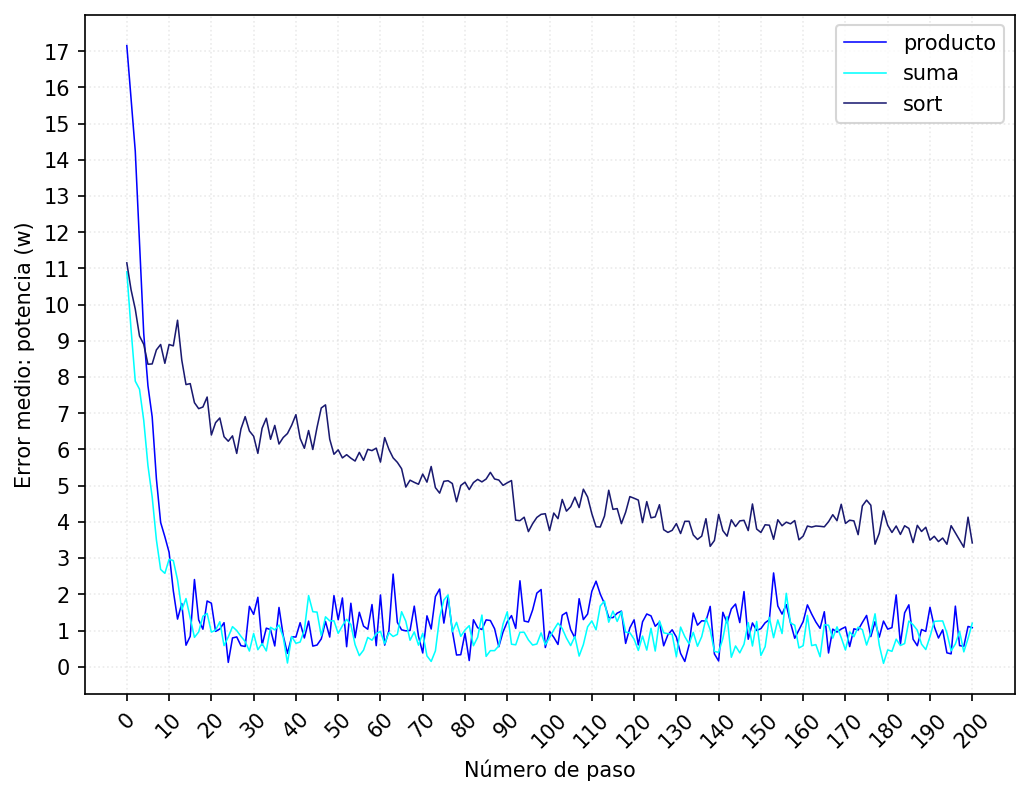

In [11]:
########################
### POWER MEAN ERROR ###
########################
key = 'power'
clr = 'blue'
pos = 8
target = 52.5
X = range(0, 201)
Xticks = np.arange(0, 201, 10)
Yticks = np.arange(0, 18, 1)

tests = [f'test-{i}1' for i in [0,1,2]]
labels = ['producto', 'suma', 'sort']
clrs  = ['blue', 'cyan', 'midnightblue']
chkpt = 5

fig = plt.figure(figsize=(8,6), dpi=150)

ax = fig.add_subplot(111)

for test, clr, label in zip(tests, clrs, labels):
    bundle = []
    for it in range(15):
        data = get_file_data(test + f'/checkpoint-{chkpt}/iter-{it}.csv', pos)
        bundle.append([ abs(x - target) for x in data ])
    bundle = np.array(bundle)
    graph = bundle.mean(axis = 0)
    
    ax.plot(
        X, graph, 
        color = clr,
        label = label,
        linestyle = '-',
        linewidth = 0.75,
        marker = '',
        alpha = 1.0
    )
    
ax.set_xlabel('Número de paso')
ax.set_xticks(Xticks)
ax.set_xticklabels(Xticks, rotation=45)

ax.set_ylabel('Error medio: potencia (w)')
ax.set_yticks(Yticks)

ax.grid(
    alpha=0.25,
    linestyle=':',
)
ax.legend()

plt.savefig(f'img2/ops.{key}.error.mean.png', bbox_inches='tight')

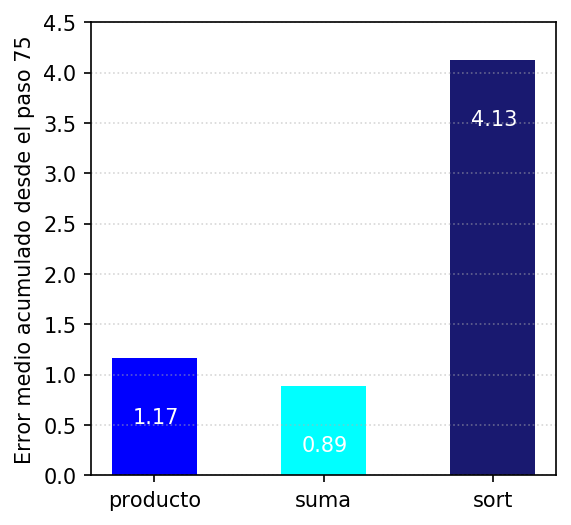

In [21]:
########################
### POWER MEAN ERROR ###
########################
key = 'power'
clr = 'blue'
pos = 8
target = 52.5
X = [1,2,3]
Xticks = np.arange(0, 201, 10)
Yticks = np.arange(0, 4.6, 0.5)

tests = [f'test-{i}1' for i in [0,1,2]]
labels = ['producto', 'suma', 'sort']
clrs  = ['blue', 'cyan', 'midnightblue']
chkpt = 5
count = 75

fig = plt.figure(figsize=(4,4), dpi=150)

ax = fig.add_subplot(111)

graph = []
for test in tests:
    bundle = []
    for it in range(15):
        data = get_file_data(test + f'/checkpoint-{chkpt}/iter-{it}.csv', pos)
        bundle.append([ abs(x - target) for x in data ])
    bundle = np.array(bundle)
    values = bundle.mean(axis = 0)
    graph.append( np.array(values[count:]).mean() )
    
ax.bar(
    X, graph, 
    color = clrs, 
    linestyle = '-',
    width = 0.5,
    alpha = 1.0
)

ax.set_xticks(X)
ax.set_xticklabels(labels)

ax.set_ylabel(f'Error medio acumulado desde el paso {count}')
ax.set_yticks(Yticks)

ax.grid(
    alpha=0.50,
    axis='y',
    linestyle=':',
)
    
for index, value in enumerate(graph):
    plt.text(index + 0.87, value - 0.65, "{:.2f}".format(value), color = 'white')


plt.savefig(f'img2/ops.{key}.error.mean.cum.png', bbox_inches='tight')

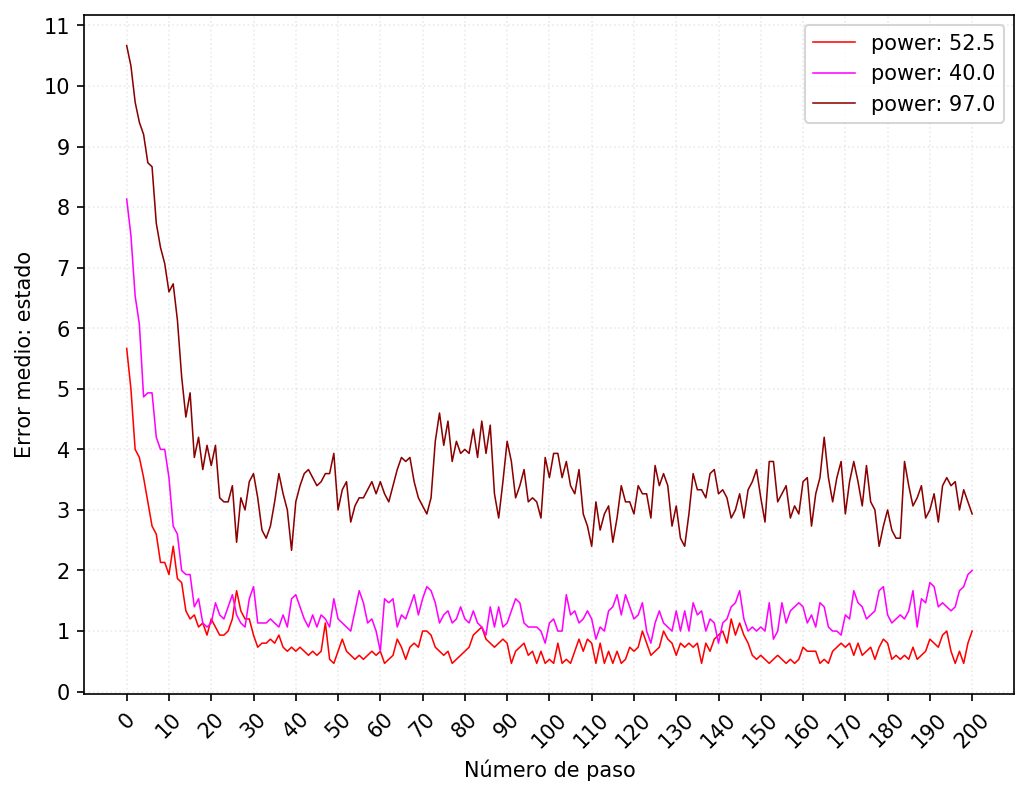

In [10]:
########################
### STATE MEAN ERROR ###
########################
key = 'state'
clr = 'red'
pos = 1
X = range(0, 201)
Xticks = np.arange(0, 201, 10)
Yticks = np.arange(0, 12, 1)

tests = [f'test-0{i}' for i in [1,2,3]]
clrs  = ['red', 'magenta', 'darkred']
targets = [14, 10, 29]
labels = [f'power: {s}' for s in [52.5, 40.0, 97.0]]

chkpt = 5

fig = plt.figure(figsize=(8,6), dpi=150)

ax = fig.add_subplot(111)

for test, clr, target, label in zip(tests, clrs, targets, labels):
    bundle = []
    for it in range(15):
        data = get_file_data(test + f'/checkpoint-{chkpt}/iter-{it}.csv', pos)
        bundle.append([ abs(x - target) for x in data ])
    bundle = np.array(bundle)
    graph = bundle.mean(axis = 0)
    
    ax.plot(
        X, graph, 
        color = clr,
        label = label,
        linestyle = '-',
        linewidth = 0.75,
        marker = '',
        alpha = 1.0
    )
    
ax.set_xlabel('Número de paso')
ax.set_xticks(Xticks)
ax.set_xticklabels(Xticks, rotation=45)

ax.set_ylabel('Error medio: estado')
ax.set_yticks(Yticks)

ax.grid(
    alpha=0.25,
    linestyle=':',
)
ax.legend()

plt.savefig(f'img/extrema.{key}.error.mean.png', bbox_inches='tight')

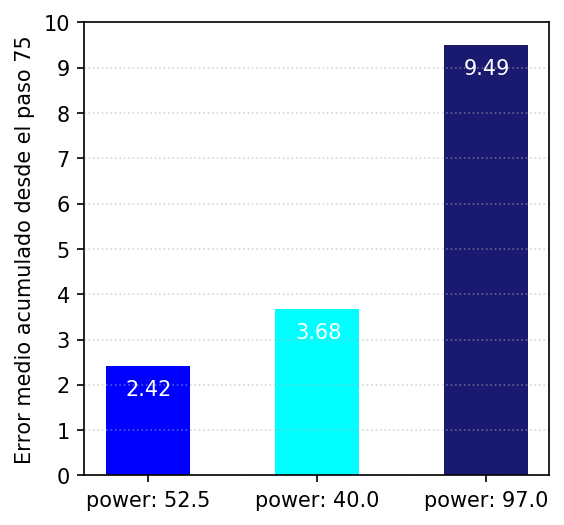

In [19]:
##############################
### POWER CUMULATIVE ERROR ###
##############################
key = 'power'
clr = 'blue'
pos = 8
targets = [52.5, 40.0, 97.0]
X = [1,2,3]
Yticks = np.arange(0, 10.1, 1)
count = 75

tests = [f'test-0{i}' for i in [1,2,3]]
clrs  = ['blue', 'cyan', 'midnightblue']
labels = [f'power: {s}' for s in targets]
chkpt = 5

fig = plt.figure(figsize=(4,4), dpi=150)
ax = fig.add_subplot(111)

graph = []
for test, target in zip(tests, targets):
    bundle = []
    for it in range(15):
        data = get_file_data(test + f'/checkpoint-{chkpt}/iter-{it}.csv', pos)
        bundle.append([ abs(x - target) for x in data ])
    bundle = np.array(bundle)
    values = bundle.mean(axis = 0)
    graph.append( np.array(values[count:]).mean() )
    
ax.bar(
    X, graph, 
    color = clrs, 
    linestyle = '-',
    width = 0.5,
    alpha = 1.0
)

ax.set_xticks(X)
ax.set_xticklabels(labels)

ax.set_ylabel(f'Error medio acumulado desde el paso {count}')
ax.set_yticks(Yticks)

ax.grid(
    alpha=0.50,
    axis='y',
    linestyle=':',
)
    
for index, value in enumerate(graph):
    plt.text(index + 0.87, value - 0.65, "{:.2f}".format(value), color = 'white')

plt.savefig(f'img/extrema.{key}.error.mean.cum.png', bbox_inches='tight')

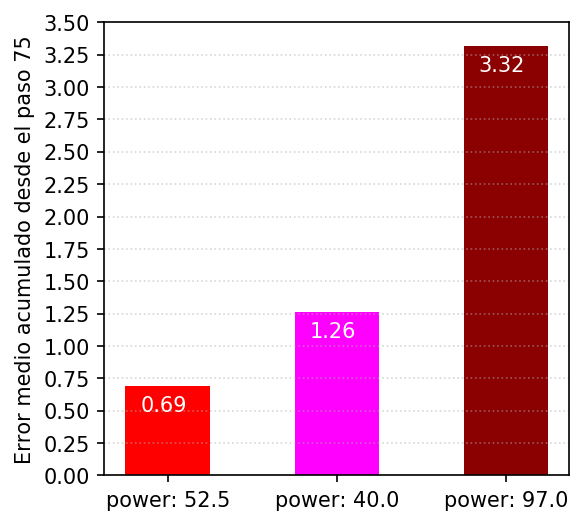

In [38]:
##############################
### STATE CUMULATIVE ERROR ###
##############################
key = 'state'
clr = 'red'
pos = 1
X = [1,2,3]
Yticks = np.arange(0, 3.51, 0.25)
count = 75

tests = [f'test-0{i}' for i in [1,2,3]]
clrs  = ['red', 'magenta', 'darkred']
targets = [14, 10, 29]
labels = [f'power: {s}' for s in [52.5, 40.0, 97.0]]
chkpt = 5

fig = plt.figure(figsize=(4,4), dpi=150)
ax = fig.add_subplot(111)

graph = []
for test, target in zip(tests, targets):
    bundle = []
    for it in range(15):
        data = get_file_data(test + f'/checkpoint-{chkpt}/iter-{it}.csv', pos)
        bundle.append([ abs(x - target) for x in data ])
    bundle = np.array(bundle)
    values = bundle.mean(axis = 0)
    graph.append( np.array(values[count:]).mean() )
    
ax.bar(
    X, graph, 
    color = clrs, 
    linestyle = '-',
    width = 0.5,
    alpha = 1.0
)

ax.set_xticks(X)
ax.set_xticklabels(labels)

ax.set_ylabel(f'Error medio acumulado desde el paso {count}')
ax.set_yticks(Yticks)

ax.grid(
    alpha=0.50,
    axis='y',
    linestyle=':',
)
    
for index, value in enumerate(graph):
    plt.text(index + 0.84, value - 0.2, "{:.2f}".format(value), color = 'white')

plt.savefig(f'img/interval.{key}.error.mean.cum.png', bbox_inches='tight')